<a href="https://colab.research.google.com/github/MagfirohIndahKarisma/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection

### Nama: Magfiroh Indah Karisma
### NIM: 2141720180
### Kelas: TI-3F

## TUGAS PRAKTIKUM
1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:
- Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.
- Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
- Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.
- Load citra yang akan diproses dan ubah menjadi citra keabuan
- Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:
- Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [1]:
# b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [6]:
# c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image
img_m = cv.imread('/content/drive/MyDrive/Study/PCVK/images/lenaa.jpg')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

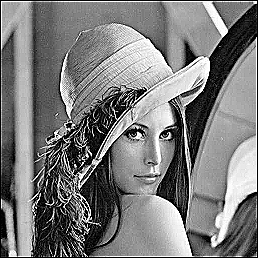

In [7]:
# Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

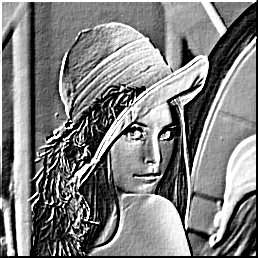

In [8]:
# Emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

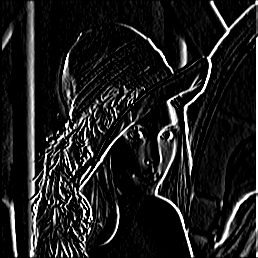

In [9]:
# Left Sobel Edge Detection
kernel_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

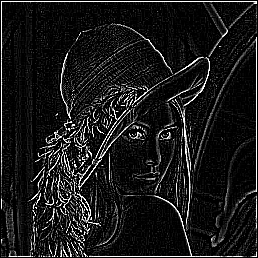

In [10]:
# Canny Edge Detection
kernel_edge = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

cv2_imshow(convolution2d(img_gray, kernel_edge, 1, 2))

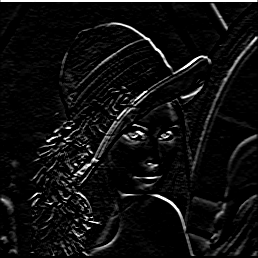

In [11]:
# Prewitt Edge Detection
kernel_sharpen = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

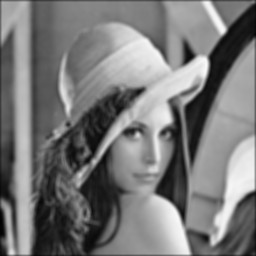

In [12]:
# 5x5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

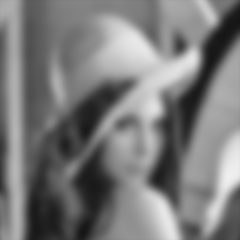

In [13]:
# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))